<img src="image.jpg">

 # PyPRT - Creation of 3D GIS Content

 Description: this notebook is used to test the integration of pyprt module into a Jupyter Notebook.

In [10]:
import sys, os

sys.path.append(os.path.join(os.getcwd(), "..", "src"))
from utility import visualize_PRT_results, combine_reports, convert_2darcgis_to_pyprt, convert_ArcGIS_geometry

SDK_PATH = os.path.join(os.getcwd(), "..", "install", "bin")
sys.path.append(SDK_PATH)

import pyprt

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy

import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import Geometry
from arcgis.features import SpatialDataFrame
from arcgis.features import FeatureLayerCollection
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.mapping import WebScene
from arcgis.mapping import SceneLayer

In [3]:
CS_FOLDER = os.getcwd()
def asset_file(filename):
    return os.path.join(CS_FOLDER, filename)

#### Test arcgis and pyprt module

In [4]:
my_gis = GIS(username="CLechot_zurich")

Enter password: ········


In [5]:
VAL = pyprt.print_val(4074)
print("\nTest Function: it should print 4074.")
print(VAL)


Test Function: it should print 4074.
4074


In [6]:
print("\nInitializing PRT.")
pyprt.initialize_prt(SDK_PATH)

if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")


Initializing PRT.
[PRT] [2019-08-29 09:57:13] [info] Esri Procedural Runtime
[PRT] [2019-08-29 09:57:13] [info] Version: 2.0.5403 | Build Date: Tue 04/09/2019 10:26 AM | Build Config: PRT_BC_REL PRT_CC_OPT PRT_TC_VC141 | OS: win32 | ARCH: x86_64
[PRT] [2019-08-29 09:57:13] [debug] prtPlugins item 0: 'C:\Users\cami9495\Documents\esri-cityengine-sdk-master\examples\py4prt\Demo1_JupyterNotebook\..\install\lib'
[PRT] [2019-08-29 09:57:13] [error] failed to load library: error while loading library 'C:\Users\cami9495\Documents\esri-cityengine-sdk-master\examples\py4prt\Demo1_JupyterNotebook\..\install\lib\com.esri.prt.unreal.dll': The specified module could not be found.

[PRT] [2019-08-29 09:57:13] [warning] failed to load library com.esri.prt.unreal.dll
[PRT] [2019-08-29 09:57:13] [error] failed to load library: error while loading library 'C:\Users\cami9495\Documents\esri-cityengine-sdk-master\examples\py4prt\Demo1_JupyterNotebook\..\install\lib\DatasmithSDK.dll': The specified module c

 ### Get building parcels from ArcGIS

<Item title:"Zurich Parcels Shapefile" type:Feature Layer Collection owner:CLechot_zurich>
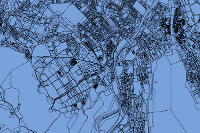

In [7]:
layer = my_gis.content.search("Zurich Parcels Shapefile","Feature Layer")[0]
layer

In [12]:
map1 = my_gis.map()
map1

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
location = geocode("Zurich")[0]
map1.extent = layer.extent
map1.add_layer({"type":"FeatureLayer", 
                "url" : "https://services2.arcgis.com/cFEFS0EWrhfDeVw9/arcgis/rest/services/Zurich_Parcels_Shapefile/FeatureServer"})

In [14]:
data_layer = pd.DataFrame.spatial.from_layer(layer.layers[0])
data_layer.head()

C:\Users\cami9495\AppData\Local\Continuum\anaconda3\envs\arcgisAPI_pyprt\lib\site-packages\IPython\lib\pretty.py:402: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
C:\Users\cami9495\AppData\Local\Continuum\anaconda3\envs\arcgisAPI_pyprt\lib\site-packages\pandas\io\formats\html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,FID,OBJID,LIEGENSCHA,NUMMERTEIL,FLAECHENMA,R1_OBJID,R1_ENTSTEH,R1_NBIDENT,R1_NUMMER,R1_EGRIS_E,...,R1_VOLLSTA,R1_VOLLST1,R1_ART,R1_ART_TXT,R1_GESAMTE,R1_QUALITA,R1_QUALIT1,Shape__Area,Shape__Length,SHAPE
0,3274,36718,Grundstueck[37286],,58,37286,LSNachfuehrung[10873],ZH0200000261,WD8808,CH767099914161,...,0,Vollstaendig,0,Liegenschaft,-99,0,AV93,127.421387,44.599382,"{""rings"": [[[947180.14953917, 6001623.05813534..."
1,3140,34354,Grundstueck[38498],,43,38498,LSNachfuehrung[7850],ZH0200000261,WD7965,CH299970589197,...,0,Vollstaendig,0,Liegenschaft,-99,0,AV93,93.317871,46.493758,"{""rings"": [[[947431.435827975, 6002633.3390738..."
2,3106,10975,Grundstueck[39740],,10,39740,LSNachfuehrung[12332],ZH0200000261,UN4796,CH627074999185,...,0,Vollstaendig,0,Liegenschaft,-99,0,AV93,22.831055,20.166588,"{""rings"": [[[950329.623347647, 6006381.1007268..."
3,3054,34666,Grundstueck[21090],,22,21090,LSNachfuehrung[10514],ZH0200000261,WP2542,CH267099917503,...,0,Vollstaendig,0,Liegenschaft,-99,0,AV93,47.022461,47.128067,"{""rings"": [[[948799.526267032, 6007108.1745609..."
4,2959,37334,Grundstueck[33853],,69,33853,LSNachfuehrung[7442],ZH0200000261,WD7408,CH379170469981,...,0,Vollstaendig,0,Liegenschaft,-99,0,AV93,149.816895,55.110942,"{""rings"": [[[946072.181378802, 6002529.8575674..."


In [15]:
data_layer.columns

Index(['FID', 'OBJID', 'LIEGENSCHA', 'NUMMERTEIL', 'FLAECHENMA', 'R1_OBJID',
       'R1_ENTSTEH', 'R1_NBIDENT', 'R1_NUMMER', 'R1_EGRIS_E', 'R1_GUELTIG',
       'R1_GUELTI1', 'R1_VOLLSTA', 'R1_VOLLST1', 'R1_ART', 'R1_ART_TXT',
       'R1_GESAMTE', 'R1_QUALITA', 'R1_QUALIT1', 'Shape__Area',
       'Shape__Length', 'SHAPE'],
      dtype='object')

In [16]:
data_layer.describe().T

,count,mean,std,min,25%,50%,75%,max
FID,67851.0,33926.000000,19587.040894,1.000000,16963.500000,33926.000000,50888.500000,6.785100e+04
FLAECHENMA,67851.0,2636.384386,24288.709586,1.000000,333.000000,663.000000,1445.000000,2.566451e+06
R1_GUELTIG,67851.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
R1_VOLLSTA,67851.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
R1_ART,67851.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
R1_GESAMTE,67851.0,-99.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.900000e+01
R1_QUALITA,67851.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Shape__Area,67851.0,5745.612743,52886.827562,1.159180,726.357666,1445.431641,3147.978516,5.581037e+06
Shape__Length,67851.0,291.367750,374.836467,4.307856,123.337552,172.420188,304.064257,1.318139e+04


### Filter the parcels to redevelop

In [17]:
filtered_data = data_layer.loc[data_layer['Shape__Area'] < 200]

In [18]:
filtered_data2 = filtered_data.loc[filtered_data['Shape__Area'] > 195]

In [19]:
data_layer.shape , filtered_data2.shape

((67851, 22), (84, 22))

In [17]:
filtered_map1 = my_gis.map()
filtered_map1

MapView(layout=Layout(height='400px', width='100%'))

In [18]:
filtered_data2.spatial.plot(kind='map', map_widget=filtered_map1)

True

In [19]:
location = geocode("Zurich")[0]
filtered_map1.extent = layer.extent

### Get the parcels geometry

In [8]:
filtered_set = layer.layers[0].query(where='Shape__Area<200 and Shape__Area>195')

In [9]:
filtered_set

<FeatureSet> 84 features

##### 1st possibility:

In [12]:
initial_geometries = []
for feature in filtered_set.features:
    geo = Geometry(feature.geometry)
    if geo.type is 'Polygon':
        initial_geometry = pyprt.Geometry(convert_2darcgis_to_pyprt(geo.coordinates()))
        initial_geometries.append(initial_geometry)

##### 2nd possibility:

In [32]:
def convert_ArcGIS_geometry(feature_set):
    initial_geometries = []
    try:
        for feature in feature_set.features:
            geo = Geometry(feature.geometry)
            if geo.type is 'Polygon':
                theArrayFromArcGIS = geo.coordinates()
                theAArray = theArrayFromArcGIS[0]
                a = theAArray[:-1]
                b = np.flip(a,axis=0)
                b[:,1] *= -1
                c = np.insert(b, 1, 0, axis=1)
                d = np.reshape(c,(1,c.shape[0]*c.shape[1]))
                initial_geometry = pyprt.Geometry(d.tolist()[0])
                initial_geometries.append(initial_geometry)
    except:
        print("This is not a feature set.")
    finally:
        return initial_geometries

In [11]:
initial_geometries1 = convert_ArcGIS_geometry(filtered_set)

This is not a feature set.


### PRT Generation

In [24]:
if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")

In [25]:
rpk = asset_file("Building_From_Footprint5.rpk")
attrs = {'ruleFile' : "rules/Buildings/Building_From_Footprint.cgb", 'startRule' : "Default$Generate", 'Reporting' : "All"}

In [26]:
mod_parcel = pyprt.ModelGenerator(initial_geometries)
generated_mod_parcel = mod_parcel.generate_model(rpk, attrs)

[PRT] [2019-08-28 16:11:02] [info] using rule package C:\Users\cami9495\Documents\esri-cityengine-sdk-master\examples\py4prt\Demo1_JupyterNotebook\Building_From_Footprint5.rpk

[PRT] [2019-08-28 16:11:02] [debug] resolve map = <ResolveMap>
	<attribute key="assets/Facades/International/Groundfloors/g_f001_t002_Mercantile_000.jpg" value="rpk:file:/C:%5CUsers%5Ccami9495%5CDocuments%5Cesri-cityengine-sdk-master%5Cexamples%5Cpy4prt%5CDemo1_JupyterNotebook%5CBuilding_From_Footprint5.rpk!/assets/Facades/International/Groundfloors/g_f001_t002_Mercantile_000.jpg" type="str"/>
	<attribute key="/ESRI.lib/assets/Facades/International/Upperfloors/u_f007_t006_Other_000.jpg" value="rpk:file:/C:%5CUsers%5Ccami9495%5CDocuments%5Cesri-cityengine-sdk-master%5Cexamples%5Cpy4prt%5CDemo1_JupyterNotebook%5CBuilding_From_Footprint5.rpk!/assets/Facades/International/Upperfloors/u_f007_t006_Other_000.jpg" type="str"/>
	<attribute key="assets/Facades/International/Upperfloors/u_f005_t009_Utility_000.jpg" value="

In [27]:
visualize_PRT_results(generated_mod_parcel)


Number of generated geometries (= nber of initial shapes):
84

Initial Shape Index: 8

Size of the matrix containing the model vertices (with possible duplicates): (46, 3)
Size of the matrix containing the model vertices (no duplicates): (14, 3)
Size of the matrix containing the model faces: (12,)

Report of the generated model:
{'Footprint Area (m2)_avg': 195.77701497043438, 'Footprint Area (m2)_max': 195.77701497043438, 'Footprint Area (m2)_min': 195.77701497043438, 'Footprint Area (m2)_n': 1.0, 'Footprint Area (m2)_sum': 195.77701497043438, 'Gross Floor Area (m2)_avg': 587.3311844955286, 'Gross Floor Area (m2)_max': 587.3311844955286, 'Gross Floor Area (m2)_min': 587.3311844955286, 'Gross Floor Area (m2)_n': 1.0, 'Gross Floor Area (m2)_sum': 587.3311844955286, 'Nbr of Floors_avg': 3.0, 'Nbr of Floors_max': 3.0, 'Nbr of Floors_min': 3.0, 'Nbr of Floors_n': 1.0, 'Nbr of Floors_sum': 3.0}


Initial Shape Index: 64

Size of the matrix containing the model vertices (with possible duplic

 ### From Python geometry to ArcGIS

In [28]:
export_file_name = "SLPKModelExportParcels"
enc_optionsSLPK = {'sceneType' : "Local",'baseName' : export_file_name,'sceneWkid' : "3857",'layerTextureEncoding' : ["2"],'layerEnabled' : [True],'layerUID' : ["1"],'layerName' : ["1"],'layerTextureQuality' : [1.0],'layerTextureCompression' : [9],'layerTextureScaling' : [1.0],'layerTextureMaxDimension' : [2048],'layerFeatureGranularity' : ["0"],'layerBackfaceCulling' : [False]}

In [30]:
mod_parcel2 = pyprt.ModelGenerator(initial_geometries)
generated_mod_parcel2 = mod_parcel.generate_model(rpk, attrs, enc_optionsSLPK, "com.esri.prt.codecs.I3SEncoder")

[PRT] [2019-08-28 16:12:55] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:12:55] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:55] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:12:55] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:12:56] [debug] width 512, height 64, 

[PRT] [2019-08-28 16:13:05] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:13:05] [debug] width 512, height 512, rasterCount 3
[PRT] [2019-08-28 16:13:06] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:06] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:06] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:06] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:06] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:06] [debug] width 1024, 

[PRT] [2019-08-28 16:13:16] [debug] width 512, height 64, rasterCount 3
[PRT] [2019-08-28 16:13:17] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:17] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:17] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:17] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:17] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:17] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:17] [warning] JPG encoder: ignoring texture channels other than the first 3.
[PRT] [2019-08-28 16:13:18] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:18] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:18] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:18] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:18] [debug] width 1024, height 128, rasterCount 3
[PRT] [2

[PRT] [2019-08-28 16:13:27] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:27] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:27] [warning] JPG encoder: ignoring texture channels other than the first 3.
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:28] [warning] JPG encoder: ignoring texture channels other than the first 3.
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, height 128, rasterCount 3
[PRT] [2019-08-28 16:13:28] [debug] width 1024, heigh

In [32]:
item = my_gis.content.add({'type':'Scene Package'}, data=asset_file("..\output\%s.slpk" % export_file_name), folder='packages')
if item is None:
    # first delete the existing one if any and add
    my_gis.content.delete_items([item])
    item = my_gis.content.add({'type':'Scene Package'}, asset_file("..\output\%s.slpk" % export_file_name), folder='packages')

In [33]:
published_item = item.publish()

In [34]:
display(published_item)

<Item title:"SLPKModelExportParcelsNEW" type:Scene Layer owner:CLechot_zurich>

In [35]:
source = 'http://zurich.maps.arcgis.com/home/webscene/viewer.html?layers=' + published_item.id

In [38]:
from IPython.display import IFrame

IFrame(src=source, width=900, height=600)

In [11]:
pyprt.shutdown_prt()
print("\nShutdown PRT.")


Shutdown PRT.
